# About the dataset

Context
Our world population is expected to grow from 7.3 billion today to 9.7 billion in the year 2050. Finding solutions for feeding the growing world population has become a hot topic for food and agriculture organizations, entrepreneurs and philanthropists. These solutions range from changing the way we grow our food to changing the way we eat. To make things harder, the world's climate is changing and it is both affecting and affected by the way we grow our food – agriculture. This dataset provides an insight on our worldwide food production - focusing on a comparison between food produced for human consumption and feed produced for animals.

Content
The Food and Agriculture Organization of the United Nations provides free access to food and agriculture data for over 245 countries and territories, from the year 1961 to the most recent update (depends on the dataset). One dataset from the FAO's database is the Food Balance Sheets. It presents a comprehensive picture of the pattern of a country's food supply during a specified reference period, the last time an update was loaded to the FAO database was in 2013. The food balance sheet shows for each food item the sources of supply and its utilization. This chunk of the dataset is focused on two utilizations of each food item available:

Food - refers to the total amount of the food item available as human food during the reference period.
Feed - refers to the quantity of the food item available for feeding to the livestock and poultry during the reference period.
Dataset's attributes:

Area code - Country name abbreviation
Area - County name
Item - Food item
Element - Food or Feed
Latitude - geographic coordinate that specifies the north–south position of a point on the Earth's surface
Longitude - geographic coordinate that specifies the east-west position of a point on the Earth's surface
Production per year - Amount of food item produced in 1000 tonnes

This is a simple exploratory notebook that heavily expolits pandas and seaborn

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# importing data
df = pd.read_csv("FAO.csv",  encoding = "ISO-8859-1")
pd.options.mode.chained_assignment = None

Let's see what the data looks like...

In [2]:
df.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


# Plot for annual produce of different countries with quantity in y-axis and years in x-axis

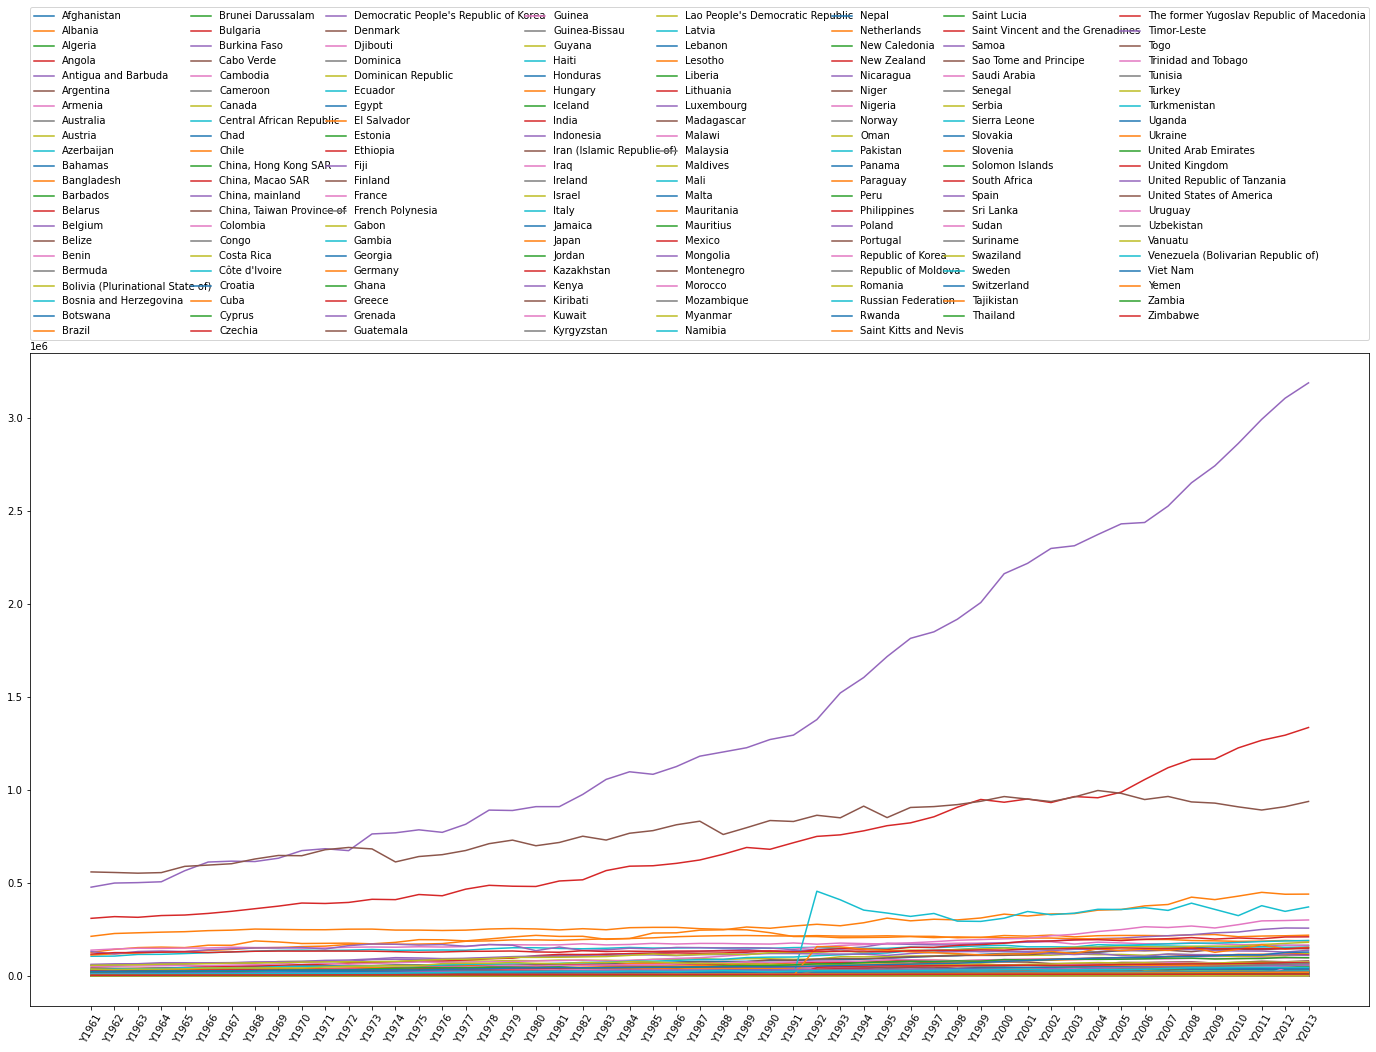

In [3]:
area_list = list(df['Area'].unique())
year_list = list(df.iloc[:,10:].columns)

plt.figure(figsize=(24,12))
for ar in area_list:
    yearly_produce = []
    for yr in year_list:
        yearly_produce.append(df[yr][df['Area'] == ar].sum())
    plt.plot(yearly_produce, label=ar)
plt.xticks(np.arange(53), tuple(year_list), rotation=60)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=8, mode="expand", borderaxespad=0.)
plt.savefig('p.png')
plt.show()

Clearly, China, India and US stand out here. So, these are the countries with most food and feed production.

Now, let's have a close look at their food and feed data

# Food and feed plot for the whole dataset

C:\Users\Ramanjaneyareddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ramanjaneyareddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


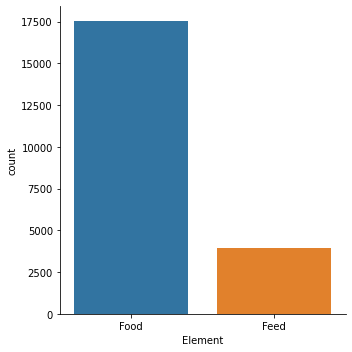

In [4]:
sns.factorplot("Element", data=df, kind="count")
plt.show()

So, there is a huge difference in food and feed production. Now, we have obvious assumptions about the following plots after looking at this huge difference.

# Food and feed plot for the largest producers(India, USA, China)

C:\Users\Ramanjaneyareddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ramanjaneyareddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Ramanjaneyareddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


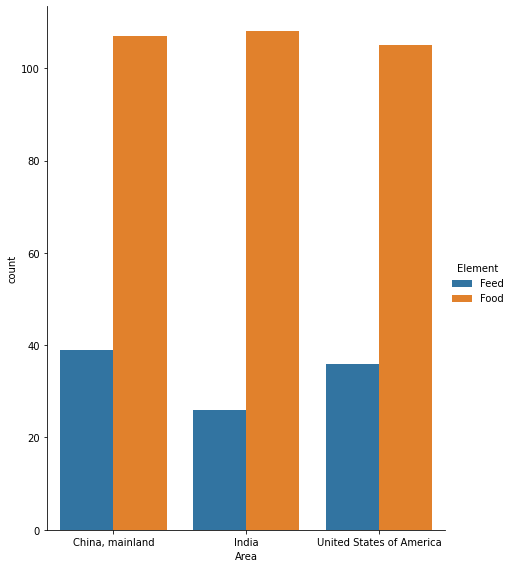

In [5]:
sns.factorplot("Area", data=df[(df['Area'] == "India") | (df['Area'] == "China, mainland") | (df['Area'] == "United States of America")], kind="count", hue="Element", size=8, aspect=.8)

Though, there is a huge difference between feed and food production, these countries' total production and their ranks depend on feed production.

Now, we create a dataframe with countries as index and their annual produce as columns from 1961 to 2013.

In [6]:
new_df_dict = {}
for ar in area_list:
    yearly_produce = []
    for yr in year_list:
        yearly_produce.append(df[yr][df['Area']==ar].sum())
    new_df_dict[ar] = yearly_produce
new_df = pd.DataFrame(new_df_dict)

new_df.head()

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,9481.0,1706.0,7488.0,4834.0,92.0,43402.0,0.0,25795.0,22542.0,0.0,...,12367.0,559347.0,4631.0,0.0,97.0,9523.0,23856.0,2982.0,2976.0,3260.0
1,9414.0,1749.0,7235.0,4775.0,94.0,40784.0,0.0,27618.0,22627.0,0.0,...,12810.0,556319.0,4448.0,0.0,101.0,9369.0,25220.0,3038.0,3057.0,3503.0
2,9194.0,1767.0,6861.0,5240.0,105.0,40219.0,0.0,28902.0,23637.0,0.0,...,13109.0,552630.0,4682.0,0.0,103.0,9788.0,26053.0,3147.0,3069.0,3479.0
3,10170.0,1889.0,7255.0,5286.0,95.0,41638.0,0.0,29107.0,24099.0,0.0,...,12965.0,555677.0,4723.0,0.0,102.0,10539.0,26377.0,3224.0,3121.0,3738.0
4,10473.0,1884.0,7509.0,5527.0,84.0,44936.0,0.0,28961.0,22664.0,0.0,...,13742.0,589288.0,4581.0,0.0,107.0,10641.0,26961.0,3328.0,3236.0,3940.0


Now, this is not perfect so we transpose this dataframe and add column names.

In [7]:
new_df = pd.DataFrame.transpose(new_df)
new_df.columns = year_list

new_df.head()

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Afghanistan,9481.0,9414.0,9194.0,10170.0,10473.0,10169.0,11289.0,11508.0,11815.0,10454.0,...,16542.0,17658.0,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706.0,23007.0
Albania,1706.0,1749.0,1767.0,1889.0,1884.0,1995.0,2046.0,2169.0,2230.0,2395.0,...,6637.0,6719.0,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221.0,8271.0
Algeria,7488.0,7235.0,6861.0,7255.0,7509.0,7536.0,7986.0,8839.0,9003.0,9355.0,...,48619.0,49562.0,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365.0,72161.0
Angola,4834.0,4775.0,5240.0,5286.0,5527.0,5677.0,5833.0,5685.0,6219.0,6460.0,...,25541.0,26696.0,28247.0,29877.0,32053.0,36985.0,38400.0,40573.0,38064.0,48639.0
Antigua and Barbuda,92.0,94.0,105.0,95.0,84.0,73.0,64.0,59.0,68.0,77.0,...,92.0,115.0,110.0,122.0,115.0,114.0,115.0,118.0,113.0,119.0


Perfect! Now, we will do some feature engineering.

# First, a new column which indicates mean produce of each state over the given years. Second, a ranking column which ranks countries on the basis of mean produce.

In [8]:
mean_produce = []
for i in range(174):
    mean_produce.append(new_df.iloc[i,:].values.mean())
new_df['Mean_Produce'] = mean_produce

new_df['Rank'] = new_df['Mean_Produce'].rank(ascending=False)

new_df.head()

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Mean_Produce,Rank
Afghanistan,9481.0,9414.0,9194.0,10170.0,10473.0,10169.0,11289.0,11508.0,11815.0,10454.0,...,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706.0,23007.0,13003.056604,69.0
Albania,1706.0,1749.0,1767.0,1889.0,1884.0,1995.0,2046.0,2169.0,2230.0,2395.0,...,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221.0,8271.0,4475.509434,104.0
Algeria,7488.0,7235.0,6861.0,7255.0,7509.0,7536.0,7986.0,8839.0,9003.0,9355.0,...,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365.0,72161.0,28879.490566,38.0
Angola,4834.0,4775.0,5240.0,5286.0,5527.0,5677.0,5833.0,5685.0,6219.0,6460.0,...,28247.0,29877.0,32053.0,36985.0,38400.0,40573.0,38064.0,48639.0,13321.056604,68.0
Antigua and Barbuda,92.0,94.0,105.0,95.0,84.0,73.0,64.0,59.0,68.0,77.0,...,110.0,122.0,115.0,114.0,115.0,118.0,113.0,119.0,83.886792,172.0


Now, we create another dataframe with items and their total production each year from 1961 to 2013

In [9]:
item_list = list(df['Item'].unique())

item_df = pd.DataFrame()
item_df['Item_Name'] = item_list

for yr in year_list:
    item_produce = []
    for it in item_list:
        item_produce.append(df[yr][df['Item']==it].sum())
    item_df[yr] = item_produce


In [10]:
item_df.head()

,Item_Name,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Wheat and products,138829.0,144643.0,147325.0,156273.0,168822.0,169832.0,171469.0,179530.0,189658.0,...,527394.0,532263.0,537279.0,529271.0,562239.0,557245.0,549926.0,578179.0,576597,587492
1,Rice (Milled Equivalent),122700.0,131842.0,139507.0,148304.0,150056.0,155583.0,158587.0,164614.0,167922.0,...,361107.0,366025.0,372629.0,378698.0,389708.0,394221.0,398559.0,404152.0,406787,410880
2,Barley and products,46180.0,48915.0,51642.0,54184.0,54945.0,55463.0,56424.0,60455.0,65501.0,...,102055.0,97185.0,100981.0,93310.0,98209.0,99135.0,92563.0,92570.0,88766,99452
3,Maize and products,168039.0,168305.0,172905.0,175468.0,190304.0,200860.0,213050.0,215613.0,221953.0,...,545024.0,549036.0,543280.0,573892.0,592231.0,557940.0,584337.0,603297.0,608730,671300
4,Millet and products,19075.0,19019.0,19740.0,20353.0,18377.0,20860.0,22997.0,21785.0,23966.0,...,25789.0,25496.0,25997.0,26750.0,26373.0,24575.0,27039.0,25740.0,26105,26346


# Some more feature engineering

This time, we will use the new features to get some good conclusions.

# 1. Total amount of item produced from 1961 to 2013
# 2. Providing a rank to the items to know the most produced item

In [11]:
sum_col = []
for i in range(115):
    sum_col.append(item_df.iloc[i,1:].values.sum())
item_df['Sum'] = sum_col
item_df['Production_Rank'] = item_df['Sum'].rank(ascending=False)

item_df.head()

,Item_Name,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,...,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Sum,Production_Rank
0,Wheat and products,138829.0,144643.0,147325.0,156273.0,168822.0,169832.0,171469.0,179530.0,189658.0,...,537279.0,529271.0,562239.0,557245.0,549926.0,578179.0,576597,587492,19194671.0,6.0
1,Rice (Milled Equivalent),122700.0,131842.0,139507.0,148304.0,150056.0,155583.0,158587.0,164614.0,167922.0,...,372629.0,378698.0,389708.0,394221.0,398559.0,404152.0,406787,410880,14475448.0,8.0
2,Barley and products,46180.0,48915.0,51642.0,54184.0,54945.0,55463.0,56424.0,60455.0,65501.0,...,100981.0,93310.0,98209.0,99135.0,92563.0,92570.0,88766,99452,4442742.0,20.0
3,Maize and products,168039.0,168305.0,172905.0,175468.0,190304.0,200860.0,213050.0,215613.0,221953.0,...,543280.0,573892.0,592231.0,557940.0,584337.0,603297.0,608730,671300,19960640.0,5.0
4,Millet and products,19075.0,19019.0,19740.0,20353.0,18377.0,20860.0,22997.0,21785.0,23966.0,...,25997.0,26750.0,26373.0,24575.0,27039.0,25740.0,26105,26346,1225400.0,38.0


# Now, we find the most produced food items in the last half-century

In [12]:
item_df['Item_Name'][item_df['Production_Rank'] < 11.0].sort_values()

56    Cereals - Excluding Beer
65     Fruits - Excluding Wine
3           Maize and products
53     Milk - Excluding Butter
6        Potatoes and products
1     Rice (Milled Equivalent)
57               Starchy Roots
64                  Vegetables
27           Vegetables, Other
0           Wheat and products
Name: Item_Name, dtype: object

So, cereals, fruits and maize are the most produced items in the last 50 years

# Food and feed plot for most produced items 

C:\Users\Ramanjaneyareddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ramanjaneyareddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Ramanjaneyareddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


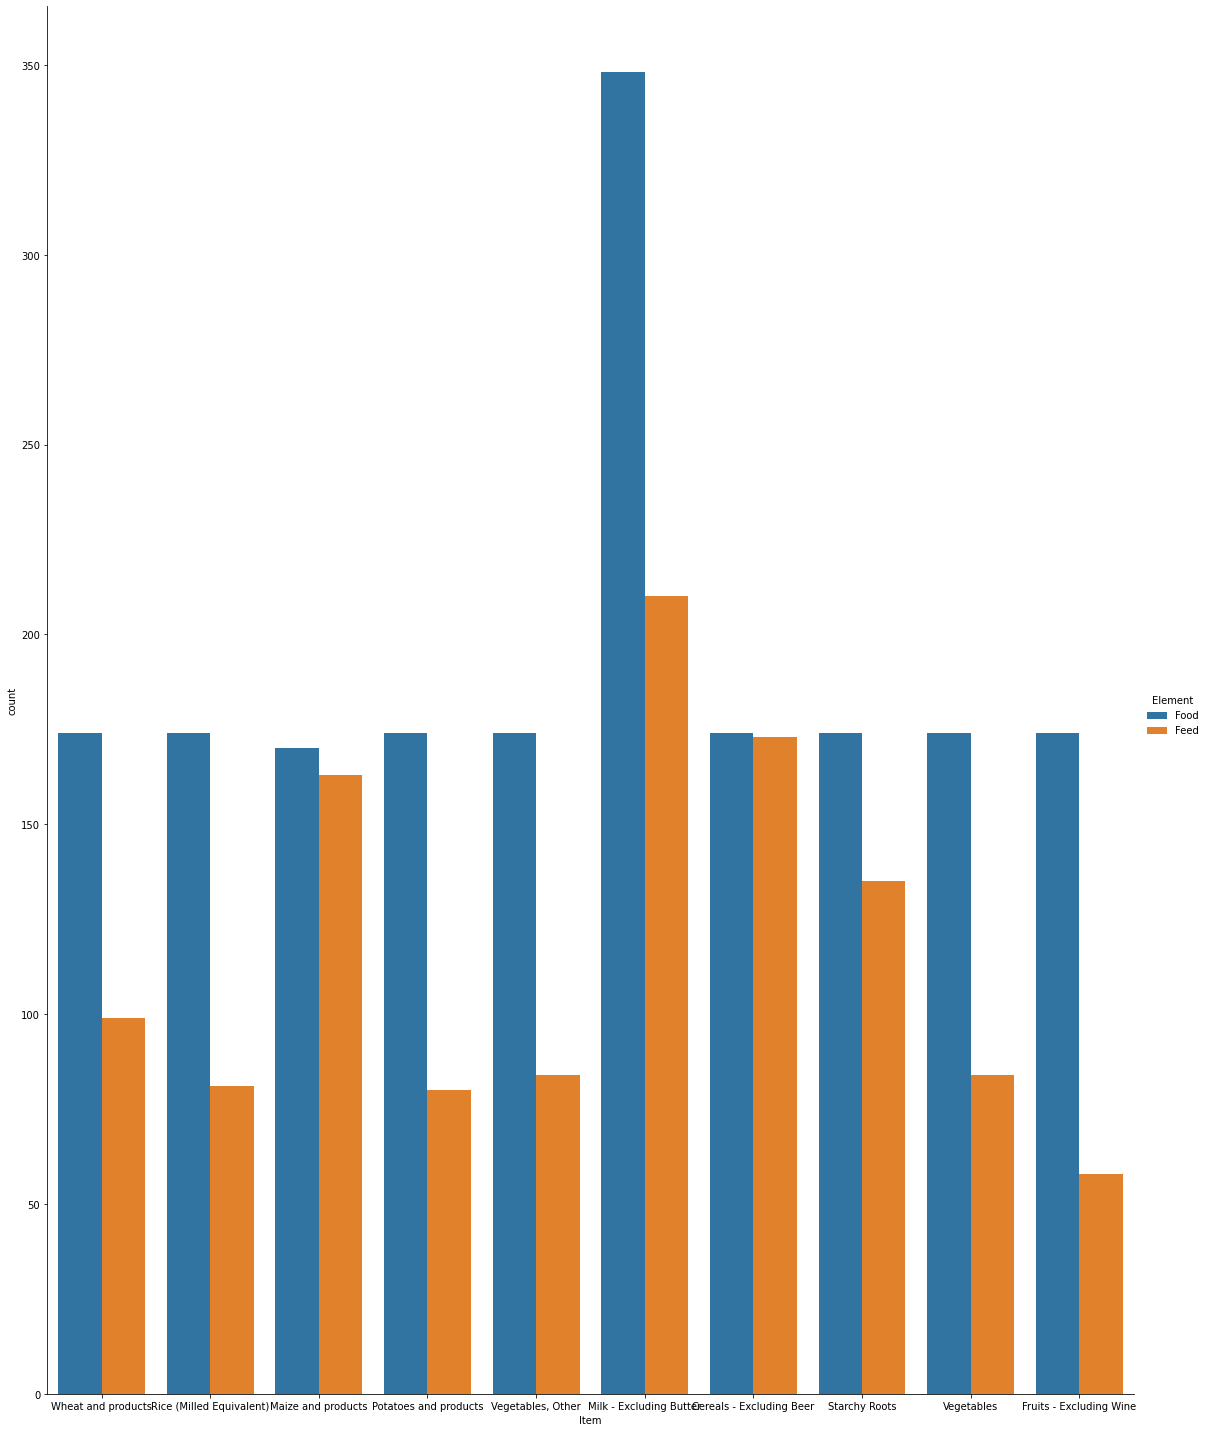

In [13]:
sns.factorplot("Item", data=df[(df['Item']=='Wheat and products') | (df['Item']=='Rice (Milled Equivalent)') | (df['Item']=='Maize and products') | (df['Item']=='Potatoes and products') | (df['Item']=='Vegetables, Other') | (df['Item']=='Milk - Excluding Butter') | (df['Item']=='Cereals - Excluding Beer') | (df['Item']=='Starchy Roots') | (df['Item']=='Vegetables') | (df['Item']=='Fruits - Excluding Wine')], kind="count", hue="Element", size=20, aspect=.8)
plt.show()

# Now, we plot a heatmap of correlation of produce in difference years

<AxesSubplot:>

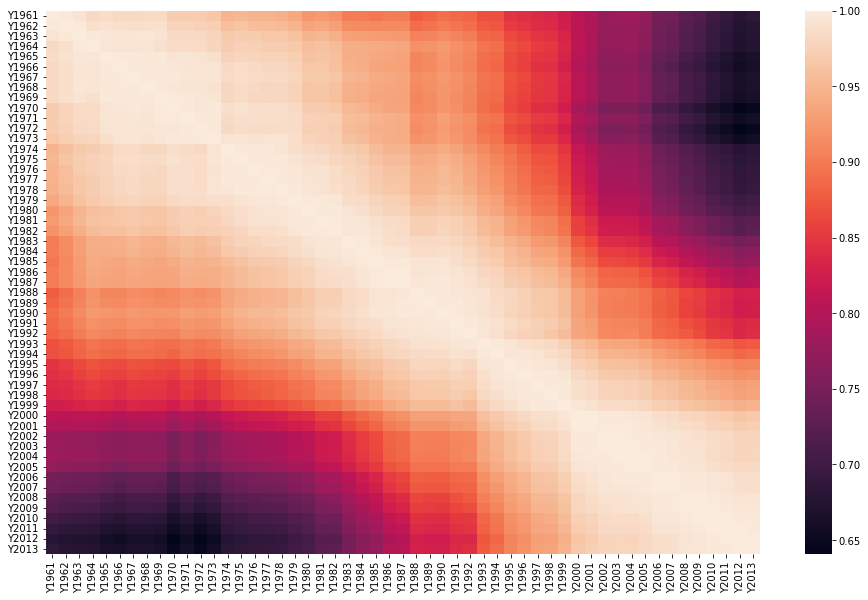

In [14]:
year_df = df.iloc[:,10:]
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(year_df.corr(), ax=ax)

So, we gather that a given year's production is more similar to its immediate previous and immediate following years.

In [ ]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10,10))
ax1.set(xlabel='Y1968', ylabel='Y1961')
ax2.set(xlabel='Y1968', ylabel='Y1963')
ax3.set(xlabel='Y1968', ylabel='Y1986')
ax4.set(xlabel='Y1968', ylabel='Y2013')
sns.jointplot(x="Y1968", y="Y1961", data=df, kind="reg", ax=ax1)
sns.jointplot(x="Y1968", y="Y1963", data=df, kind="reg", ax=ax2)
sns.jointplot(x="Y1968", y="Y1986", data=df, kind="reg", ax=ax3)
sns.jointplot(x="Y1968", y="Y2013", data=df, kind="reg", ax=ax4)
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)

# Heatmap of production of food items over years

This will detect the items whose production has drastically increased over the years

In [ ]:
new_item_df = item_df.drop(["Item_Name","Sum","Production_Rank"], axis = 1)
fig, ax = plt.subplots(figsize=(12,24))
sns.heatmap(new_item_df,ax=ax)
ax.set_yticklabels(item_df.Item_Name.values[::-1])
plt.show()

There is considerable growth in production of Palmkernel oil, Meat/Aquatic animals, ricebran oil, cottonseed, seafood, offals, roots, poultry meat, mutton, bear, cocoa, coffee and soyabean oil.
There has been exceptional growth in production of onions, cream, sugar crops, treenuts, butter/ghee and to some extent starchy roots.

Now, we look at clustering.

# What is clustering?
Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including machine learning, pattern recognition, image analysis, information retrieval, bioinformatics, data compression, and computer graphics.

# Today, we will form clusters to classify countries based on productivity scale

For this, we will use k-means clustering algorithm.
# K-means clustering
(Source [Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering#Standard_algorithm) )
![http://gdurl.com/5BbP](http://gdurl.com/5BbP)

This is the data we will use.

In [ ]:
new_df.head()

In [ ]:
X = new_df.iloc[:,:-2].values

X = pd.DataFrame(X)
X = X.convert_objects(convert_numeric=True)
X.columns = year_list

# Elbow method to select number of clusters
This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion". This "elbow" cannot always be unambiguously identified. Percentage of variance explained is the ratio of the between-group variance to the total variance, also known as an F-test. A slight variation of this method plots the curvature of the within group variance.
# Basically, number of clusters = the x-axis value of the point that is the corner of the "elbow"(the plot looks often looks like an elbow)

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As the elbow corner coincides with x=2, we will have to form **2 clusters**. Personally, I would have liked to select 3 to 4 clusters. But trust me, only selecting 2 clusters can lead to best results.
Now, we apply k-means algorithm.

In [ ]:
kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(X)

X = X.as_matrix(columns=None)

Now, let's visualize the results.

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red',label='Others')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue',label='China(mainland),USA,India')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of countries by Productivity')
plt.legend()
plt.show()

So, the blue cluster represents China(Mainland), USA and India while the red cluster represents all the other countries.
This result was highly probable. Just take a look at the plot of cell 3 above. See how China, USA and India stand out. That has been observed here in clustering too.

You should try this algorithm for 3 or 4 clusters. Looking at the distribution, you will realise why 2 clusters is the best choice for the given data

This is not the end! More is yet to come.